В чем проблема **GridSearch** / **RandomizedSearch**?

- можно легко "промахнуться"
- не учитывается информация о предыдущих запусках
- при росте количества гиперпараметров количество запусков для полного/частичного перебора значительно возрастает

### Sequential Model-Based Optimization


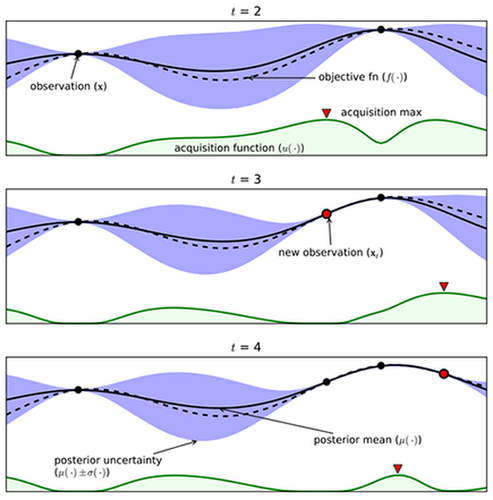


На каждом шаге работы SMBO:

- Строится вероятностная модель (суррогатная функция) целевой функции.
- Подбираются гиперпараметры, которые лучше всего подходят для вероятностной модели.
- Подобранные гиперпараметры применяются к целевой функции.
- Вероятностная модель перестраивается (обновляется).
- Шаги 2-4 повторяются столько раз, сколько задал пользователь.

**Exploration vs Exploitation**

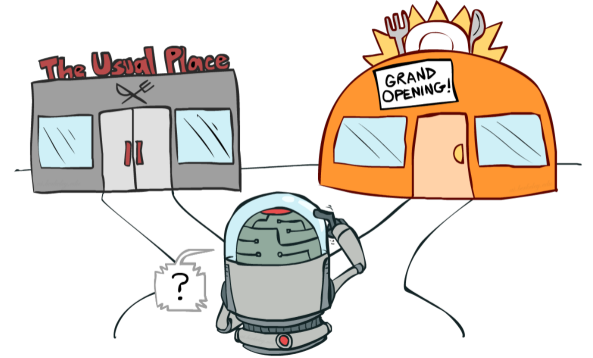

## Optuna

[Документация](https://optuna.readthedocs.io/en/stable/index.html)

[Optuna VS Hyperopt](https://neptune.ai/blog/optuna-vs-hyperopt)

В optuna по умолчанию используется Tree-structured parzen estimator (TPE) - вариант SMBO

In [ ]:
%%capture

!pip install optuna

In [ ]:
import optuna

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [ ]:
X, y  = load_iris(return_X_y=True, as_frame=True)

In [ ]:
def objective(trial):
    classifier_name = trial.suggest_categorical("classifier", ["SVC", "RandomForest"])
    if classifier_name == "SVC":
        svc_c = trial.suggest_float("svc_c", 1e-10, 1e10)
        classifier_obj = SVC(C=svc_c, gamma="auto")
    else:
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32)
        classifier_obj = RandomForestClassifier(max_depth=rf_max_depth, n_estimators=10)

    score = cross_val_score(classifier_obj, X, y, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

In [ ]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

[I 2023-01-19 12:03:39,229] A new study created in memory with name: no-name-3556a351-6884-4d15-a13d-3e65827f1678
[I 2023-01-19 12:03:40,517] Trial 0 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 7}. Best is trial 0 with value: 0.9466666666666667.
[I 2023-01-19 12:03:40,549] Trial 1 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 2341473529.521096}. Best is trial 1 with value: 0.96.
[I 2023-01-19 12:03:40,601] Trial 2 finished with value: 0.9666666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 10}. Best is trial 2 with value: 0.9666666666666667.
[I 2023-01-19 12:03:40,644] Trial 3 finished with value: 0.9466666666666667 and parameters: {'classifier': 'RandomForest', 'rf_max_depth': 8}. Best is trial 2 with value: 0.9666666666666667.
[I 2023-01-19 12:03:40,660] Trial 4 finished with value: 0.96 and parameters: {'classifier': 'SVC', 'svc_c': 7861251837.629995}. Best is trial 2 with

In [ ]:
print(study.best_trial)

FrozenTrial(number=2, state=TrialState.COMPLETE, values=[0.9666666666666667], datetime_start=datetime.datetime(2023, 1, 19, 12, 3, 40, 555636), datetime_complete=datetime.datetime(2023, 1, 19, 12, 3, 40, 601144), params={'classifier': 'RandomForest', 'rf_max_depth': 10}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'classifier': CategoricalDistribution(choices=('SVC', 'RandomForest')), 'rf_max_depth': IntDistribution(high=32, log=False, low=2, step=1)}, trial_id=2, value=None)


In [ ]:
from optuna.visualization import plot_optimization_history

plot_optimization_history(study)

In [ ]:
from optuna.visualization import plot_slice

plot_slice(study)